<a href="https://colab.research.google.com/github/sawsanzaky/Deep_learning/blob/main/ANN(MLP)_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing Neural Network with Scikit-Learn**

import library

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [16]:
data = sns.load_dataset("iris")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Preprocessing

In [21]:
feature= data.iloc[:,0:-1]
label=data.iloc[:,-1]

In [22]:
label.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Data Exploratory 

In [23]:
label.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
label.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

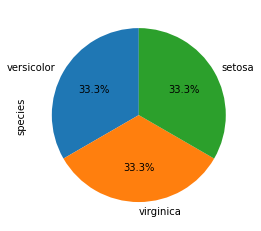

In [37]:
label.value_counts().plot.pie(startangle=90, autopct='%1.1f%%')
plt.show()

In [44]:
label.values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [46]:
y = data.select_dtypes(include=[object])

In [47]:
#convert Label into numerical 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

In [48]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


**Train Test Split**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size = 0.20)


**Feature Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training and Predictions**

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())  #By default the 'relu' activation function is used with 'adam' cost optimizer

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [54]:
predictions = mlp.predict(X_test)
predictions

array([2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1,
       2, 2, 0, 2, 2, 0, 0, 2])

**Evaluating the Algorithm**

In [56]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

